In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string   
import re
import warnings
warnings.simplefilter("ignore")

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df=pd.read_csv("data/updated_data.csv", encoding="latin1")

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df

,review_date,review_rating,review_title,review_text,verified_purchase
0,1/1/2019,5,Dove MenÂs + Deodorant,"As you get older, you know what you like and w...",True
1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,1/2/2019,4,Vitamin B12.,Excellent,True
3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,1/2/2019,5,Very handy,Does what is says it does,False
...,...,...,...,...,...
2496,4/27/2019,5,perfect,"These are amazing, just like the original Corn...",False
2497,5/2/2019,5,delicious,Our whole family loves bovril and we use it da...,False
2498,5/5/2019,1,This review is for the squeezy bottle,Contents of this bottle is lovely. HOWEVER try...,False
2499,5/17/2019,4,very nice,These taste great and you cannot Cant tell the...,False


In [ ]:
## removing duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
### Checking Null Values
df.isnull().sum()

review_date           0
review_rating         0
review_title         66
review_text           0
verified_purchase     0
dtype: int64

In [ ]:
## review_title has too many null values and review_date has no relevance for our task , so removing both
df.drop(["review_title","review_date"], axis=1, inplace=True)

**Some EDA on 'review_text' column **

In [ ]:
#words Count
df['total words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#Characters Count
df['total characters'] = df['review_text'].str.len()

#Stopwords Count
sw = set(stopwords.words('english'))
df['total stopwords'] = df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#punctuations Count
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))

#Uppercase Count
df['total uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len() 

In [ ]:
df.head()

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [ ]:
print(df.describe())

       review_rating  total words  total characters  total stopwords  \
count    1718.000000  1718.000000       1718.000000      1718.000000   
mean        4.441793    33.198487        177.890570         9.257276   
std         1.123083    35.251879        189.818467         8.537092   
min         1.000000     1.000000          2.000000         0.000000   
25%         4.000000     7.000000         41.000000         2.000000   
50%         5.000000    21.000000        114.500000         7.000000   
75%         5.000000    50.000000        268.750000        15.000000   
max         5.000000   287.000000       1624.000000        48.000000   

       total punctuations  total uppercases  
count         1718.000000       1718.000000  
mean             4.434226          3.710128  
std              5.177685          4.209264  
min              0.000000          0.000000  
25%              1.000000          1.000000  
50%              3.000000          2.000000  
75%              7.000000    



*   Fake reviews have more words per character as compared to true reviews
*   Fake reviews have more stopwords

*   Fake reviews have longer sentences and more punctuations





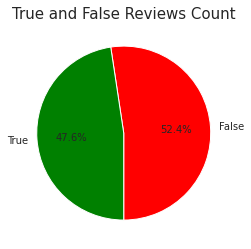

In [ ]:
#Pie Chart of Reviews
colors = ['red','green']
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=270)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

True and False values percentages are still nearly equal so dataset is balanced after dropping duplicates and null values

Text(0.5, 1.0, 'Review ratings vs Count of Reviews grouped by True / False')

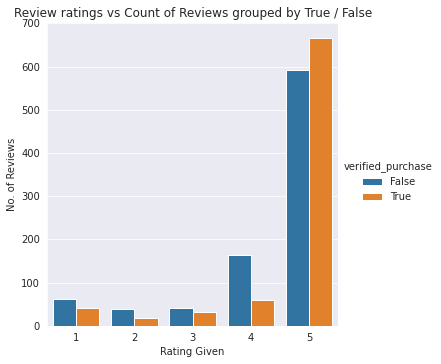

In [ ]:

sns.catplot(x ='review_rating',kind="count", hue="verified_purchase", data=df)
plt.xlabel("Rating Given")
plt.ylabel("No. of Reviews")
plt.title("Review ratings vs Count of Reviews grouped by True / False")

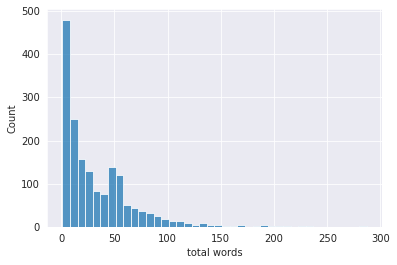

In [ ]:
sns.histplot(x='total words', data=df, )
plt.show()

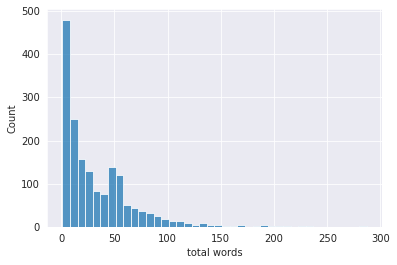

In [ ]:
sns.histplot(x='total words', data=df, )
plt.show()

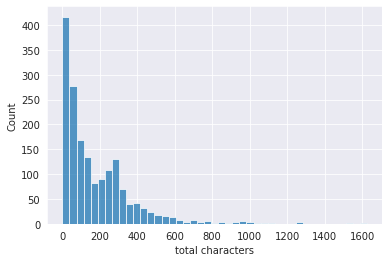

In [ ]:
sns.histplot(x='total characters', data=df, )
plt.show()

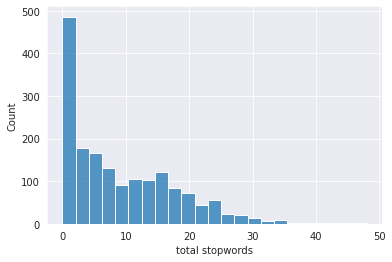

In [ ]:
sns.histplot(x='total stopwords', data=df, )
plt.show()

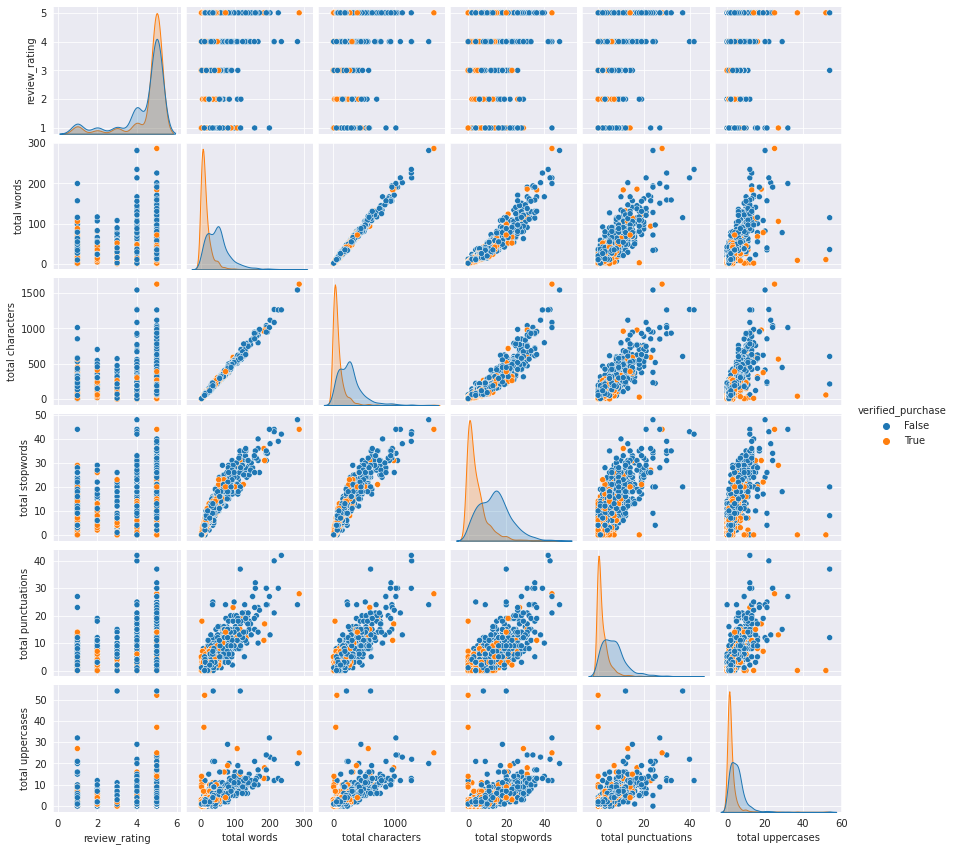

In [ ]:
sns.pairplot(df, hue='verified_purchase', height=2)

In [ ]:
df.head()

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


<AxesSubplot:xlabel='review_rating'>

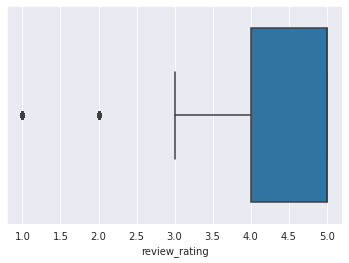

In [ ]:
sns.boxplot(x='review_rating', data=df)

<AxesSubplot:ylabel='verified_purchase'>

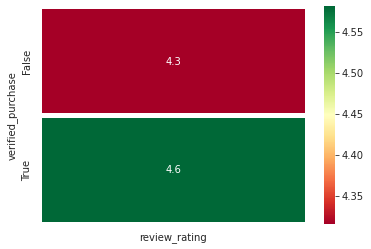

In [ ]:
# df_heatmap = df.pivot("", "review_text", "verified_purchase")
df_heatmap = df.pivot_table(index='verified_purchase', values='review_rating')
sns.heatmap(df_heatmap,cmap ='RdYlGn', linewidths = 5, annot = True)

In [ ]:
#DROP UNNECESSARY COLUMNS
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


# Data Pre-Processing

In [ ]:
## Spelling Correction
df.review_text.apply(lambda i: ''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
                              ...                        
1713    These are amazing, just like the original Corn...
1714    Our whole family loves boris and we use it dai...
1715    Contents of this bottle is lovely. HOWEVER try...
1716    These taste great and you cannot Want tell the...
1717    Really pleased to have began Cornettos at last...
Name: review_text, Length: 1718, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tkn = removed_special_characters.lower().split()
    
    lmtzr = WordNetLemmatizer()
    corrected = []
    lmtzd = []
    
    for token in tkn:
        if token not in sw:
            corrected.append(token)
            
    for token in corrected:
        token = lmtzr.lemmatize(token)
        lmtzd.append(token)

    return " ".join(lmtzd)

    

In [ ]:
df['review_text'] = df['review_text'].apply(text_preprocessing)

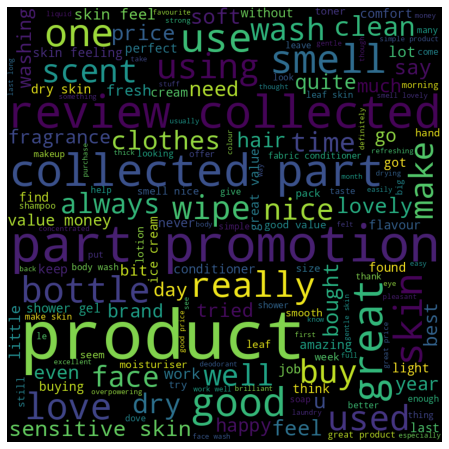

In [ ]:
## WordCloud
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "
word_cloud = WordCloud(width = 800, height = 800, 
                       background_color ='black', 
                       min_font_size = 12).generate(words) 
plt.figure(figsize = (8, 8)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.show()

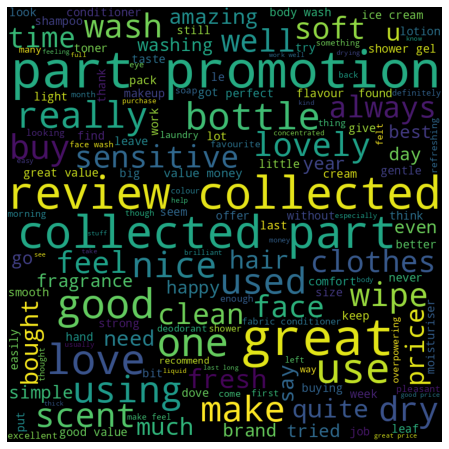

In [ ]:
#removing common words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

#Updated WordCloud after removing common words 
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "
word_cloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 12).generate(words) 
plt.figure(figsize = (8, 8)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.show()

In [ ]:
df.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,review_text,verified_purchase
0,get older know like suitable body like dove give fresh wide awake feeling dandruff flakey smelly pit,True
1,three gigantic marmite jar last probably whole life else would possibly wish order came time mentioned safely packed happy,True
2,excellent,True
3,great flavour top slow cooking,True
4,say,False
5,excellent item good men,False
6,thank happy,True
7,beautiful,True
8,always buy big bottle,True
9,always use heavily mistreated hair work wonder time time,True


In [ ]:
print(df.head())
print(df.shape)

                                         review_text  verified_purchase
0  get older know like suitable body like dove gi...               True
1  three gigantic marmite jar last probably whole...               True
2                                          excellent               True
3                     great flavour top slow cooking               True
4                                                say              False
(1718, 2)


In [ ]:
df.to_csv('data/cleaned_data.csv')